In [2]:
#Importing the necessary packages for this task/
# (Step 1: Creating and viewing a df for the db data from postgreSQL.
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import urllib.parse
import matplotlib.pyplot as plt
database_name = 'TellCo'
table_name= 'xdr_data'
    
#Encoding my password since it has the @ symbol\
#which is the connection syntax used to separate\ 
#the username and the pasword from the hostname.
encoded_password = urllib.parse.quote("Sheila@49")
connection_params = {
    "host": "localhost",
    "user": "postgres",
    "password": encoded_password,
    "port": "5432",
    "database": "TellCo"
}
# Establish connection to the PostgreSQL database
engine = create_engine(
    f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}"
    f"@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}"
)


# Using the SQL SELECT command to retrieve the data from the database.
sql_query = 'SELECT * FROM xdr_data'
                       
#Creating a dataframe of the dtable data.
df = pd.read_sql(sql_query, con= engine)
                       
# Display the df in a more structured and visually appealing format.
print (df)



           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

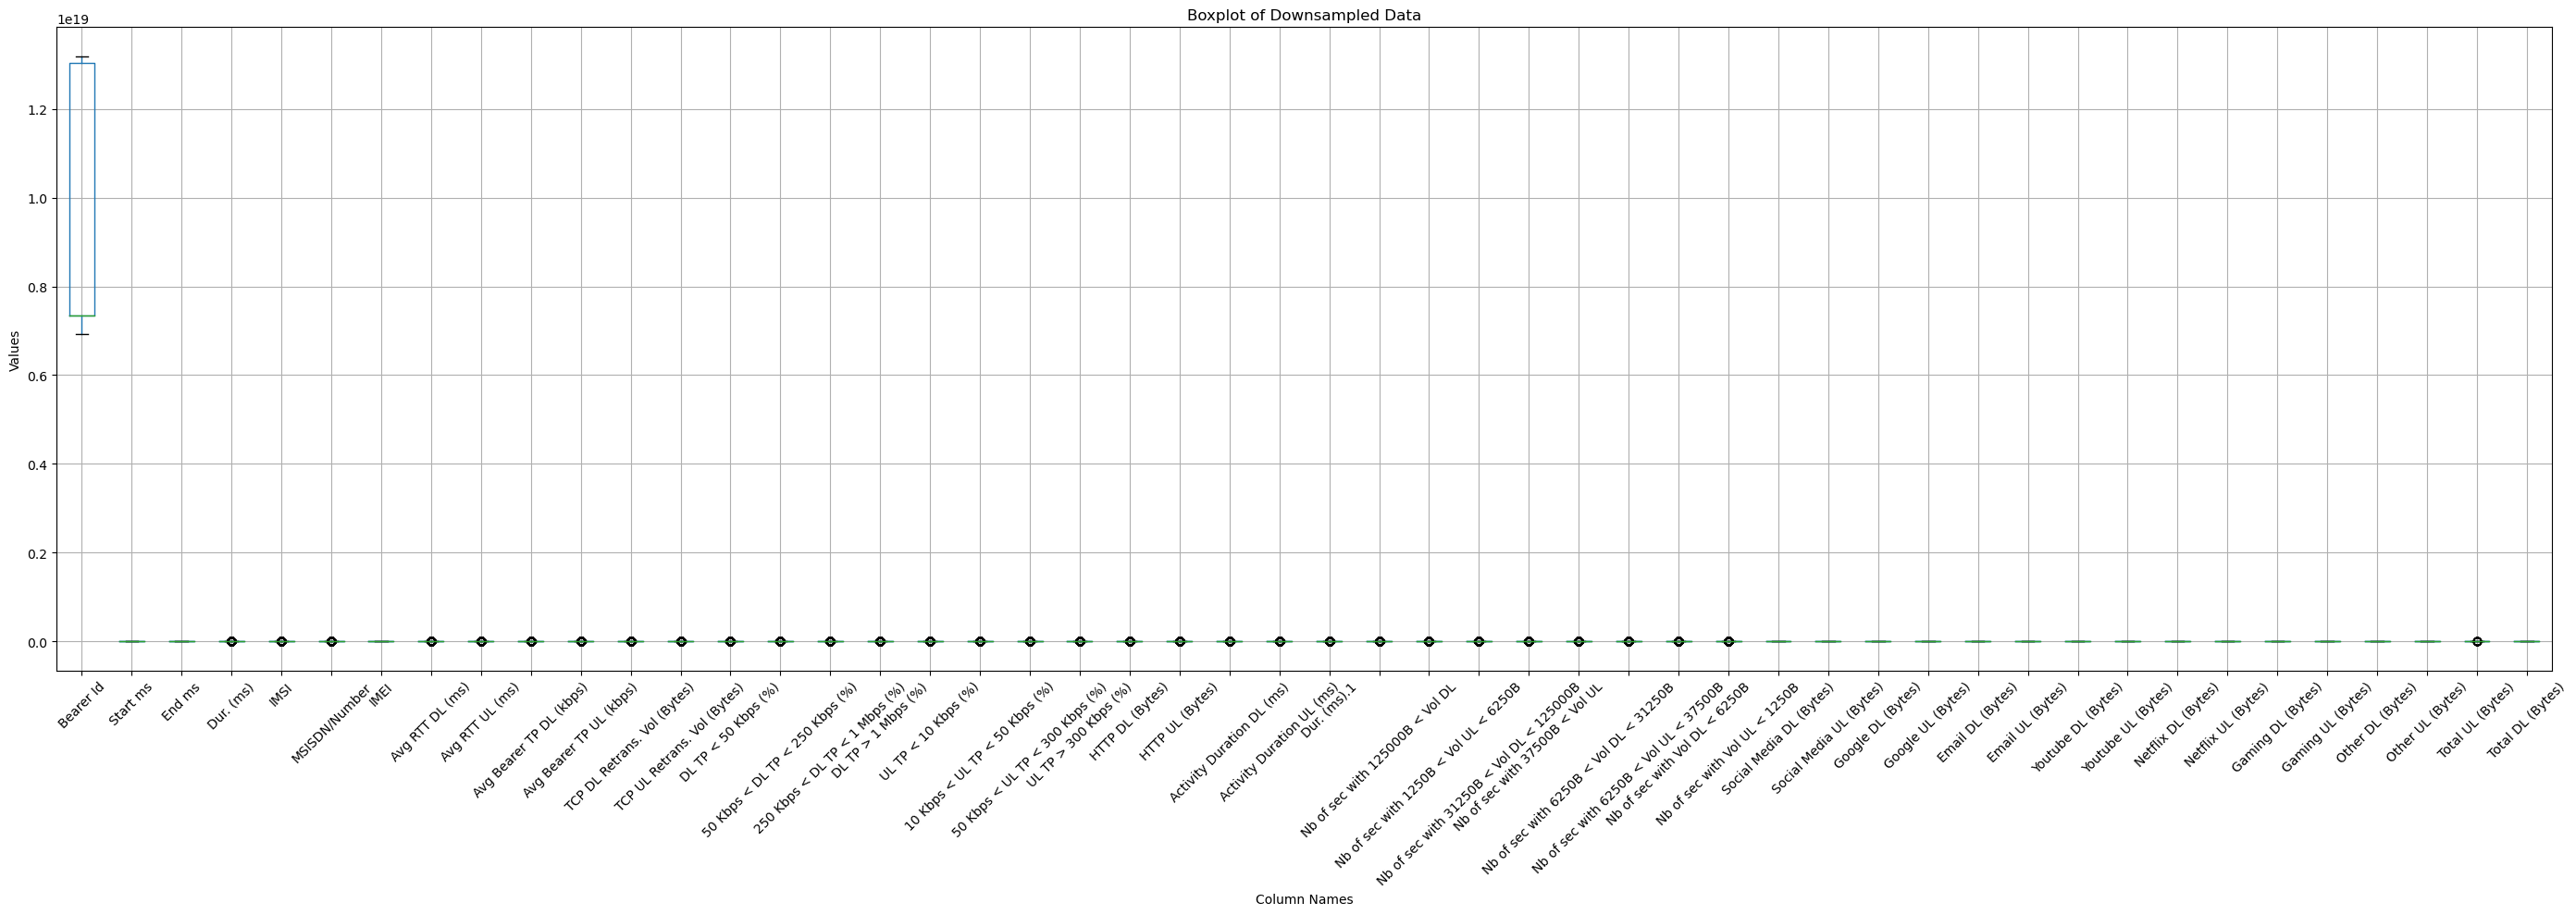

C:\Users\HP\AppData\Local\Temp\ipykernel_1216\2715800188.py:44: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                                          Bearer Id  Start ms    End ms  \
Bearer Id                                  1.000000  0.002961 -0.001219   
Start ms                                   0.002961  1.000000  0.120945   
End ms                                    -0.001219  0.120945  1.000000   
Dur. (ms)                                  0.007515  0.001287 -0.001302   
IMSI                                       0.000152 -0.000054  0.000328   
MSISDN/Number                             -0.003307 -0.001021 -0.001890   
IMEI                                       0.164054 -0.001133 -0.000032   
Avg RTT DL (ms)                           -0.022561  0.004141 -0.005287   
Avg RTT UL (ms)                            0.034924 -0.002221 -0.002607   
Avg Bearer TP DL (kbps)                    0.063973 -0.000690  0.000694   
Avg Bearer TP UL (kbps)                    0.048123 -0.001268  0.000687   
TCP DL Retrans. Vol (Bytes)                0.019186  0.000328  0.004941   
TCP UL Retrans. Vol (Byte

In [4]:
# (Step 2) Visualizising the data properties. 
#All columns and their data types.
print (df.info())

#Obtaining the number of rows and columns of the dataset
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

#Descriptive analysis
df.describe ()

#Finding the % of missing values in each column
# Step 1: Create a boolean mask for missing values
missing_values_mask = df.isna()

# Step 2: Count the number of missing values in each column
missing_values_count = missing_values_mask.sum()

# Step 3: Calculate the percentage of missing values
total_rows = len(df)
missing_values_percentage = (missing_values_count / total_rows) * 100

# Step 4: Print or display the results
print("Percentage of missing values in each column:")
print(missing_values_percentage)

#Identifying the nature of the outliers using the Box plot.
# Downsample the data by selecting every nth row.
n = 10  # Adjust the value of n as needed
downsampled_df = df.iloc[::n, :]

# Generate a boxplot for the downsampled data
plt.figure(figsize=(28, 10))
downsampled_df.boxplot()
plt.title('Boxplot of Downsampled Data')
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#Identifying the correlation between the columns
correlation_matrix = df.corr()

# Print correlation matrix
print(correlation_matrix)


In [5]:
#Step 3: Data Cleaning.
#Data type corrections(changing object data types to string)
# Define data types for specific columns
dtype_mapping = {
    'Start': 'string',
    'End': 'string',
    'Last Location Name': 'string',
    'Handset Manufacturer': 'string',
    'Handset Type': 'string',
    
}

# Convert data types of specific columns
for column, data_type in dtype_mapping.items():
    df[column] = df[column].astype(data_type)
print(df.dtypes)

# Treating the missing values.
# Replace missing numerical values with column mean.
df.fillna(df.mean(numeric_only=True), inplace=True)
print (df.info())
# Replacing the missing text values with the column mode.
# Get only the string columns.
string_columns = df.select_dtypes(include=['string']).columns

# Calculate the mode for each string column.
mode_values = df[string_columns].mode().iloc[0]

# Fill null values in string columns with the mode for each column.
df[string_columns] = df[string_columns].fillna(mode_values)

# Check if any null values remain.
if df[string_columns].isnull().values.any():
    print("Some null values in string columns could not be filled.")
    
#Print new df.
print (df.info())

# Treating Outliers




Bearer Id                                   float64
Start                                        string
Start ms                                    float64
End                                          string
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           string
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [7]:
import pandas as pd

# Assuming df is your DataFrame

# Filter numeric columns
numeric_columns = df.select_dtypes(include='number')

# Calculate the mean of each numeric column
column_means = numeric_columns.mean()

def replace_outliers_with_mean(row, column_means):
    for column in column_means.index:
        if abs(row[column] - column_means[column]) > 3 * numeric_columns[column].std():  # Define your outlier detection condition
            row[column] = column_means[column]  # Replace outlier with mean
    return row

# Apply the function to each row of the DataFrame
df = df.apply(replace_outliers_with_mean, axis=1, column_means=column_means)

print(df)


KeyboardInterrupt: 

In [22]:
print(df.columns)


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [28]:
# Bivariate Analysis
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Total DL (Bytes)', 'Total UL (Bytes)']])
plt.title("Pairplot of Variables")
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

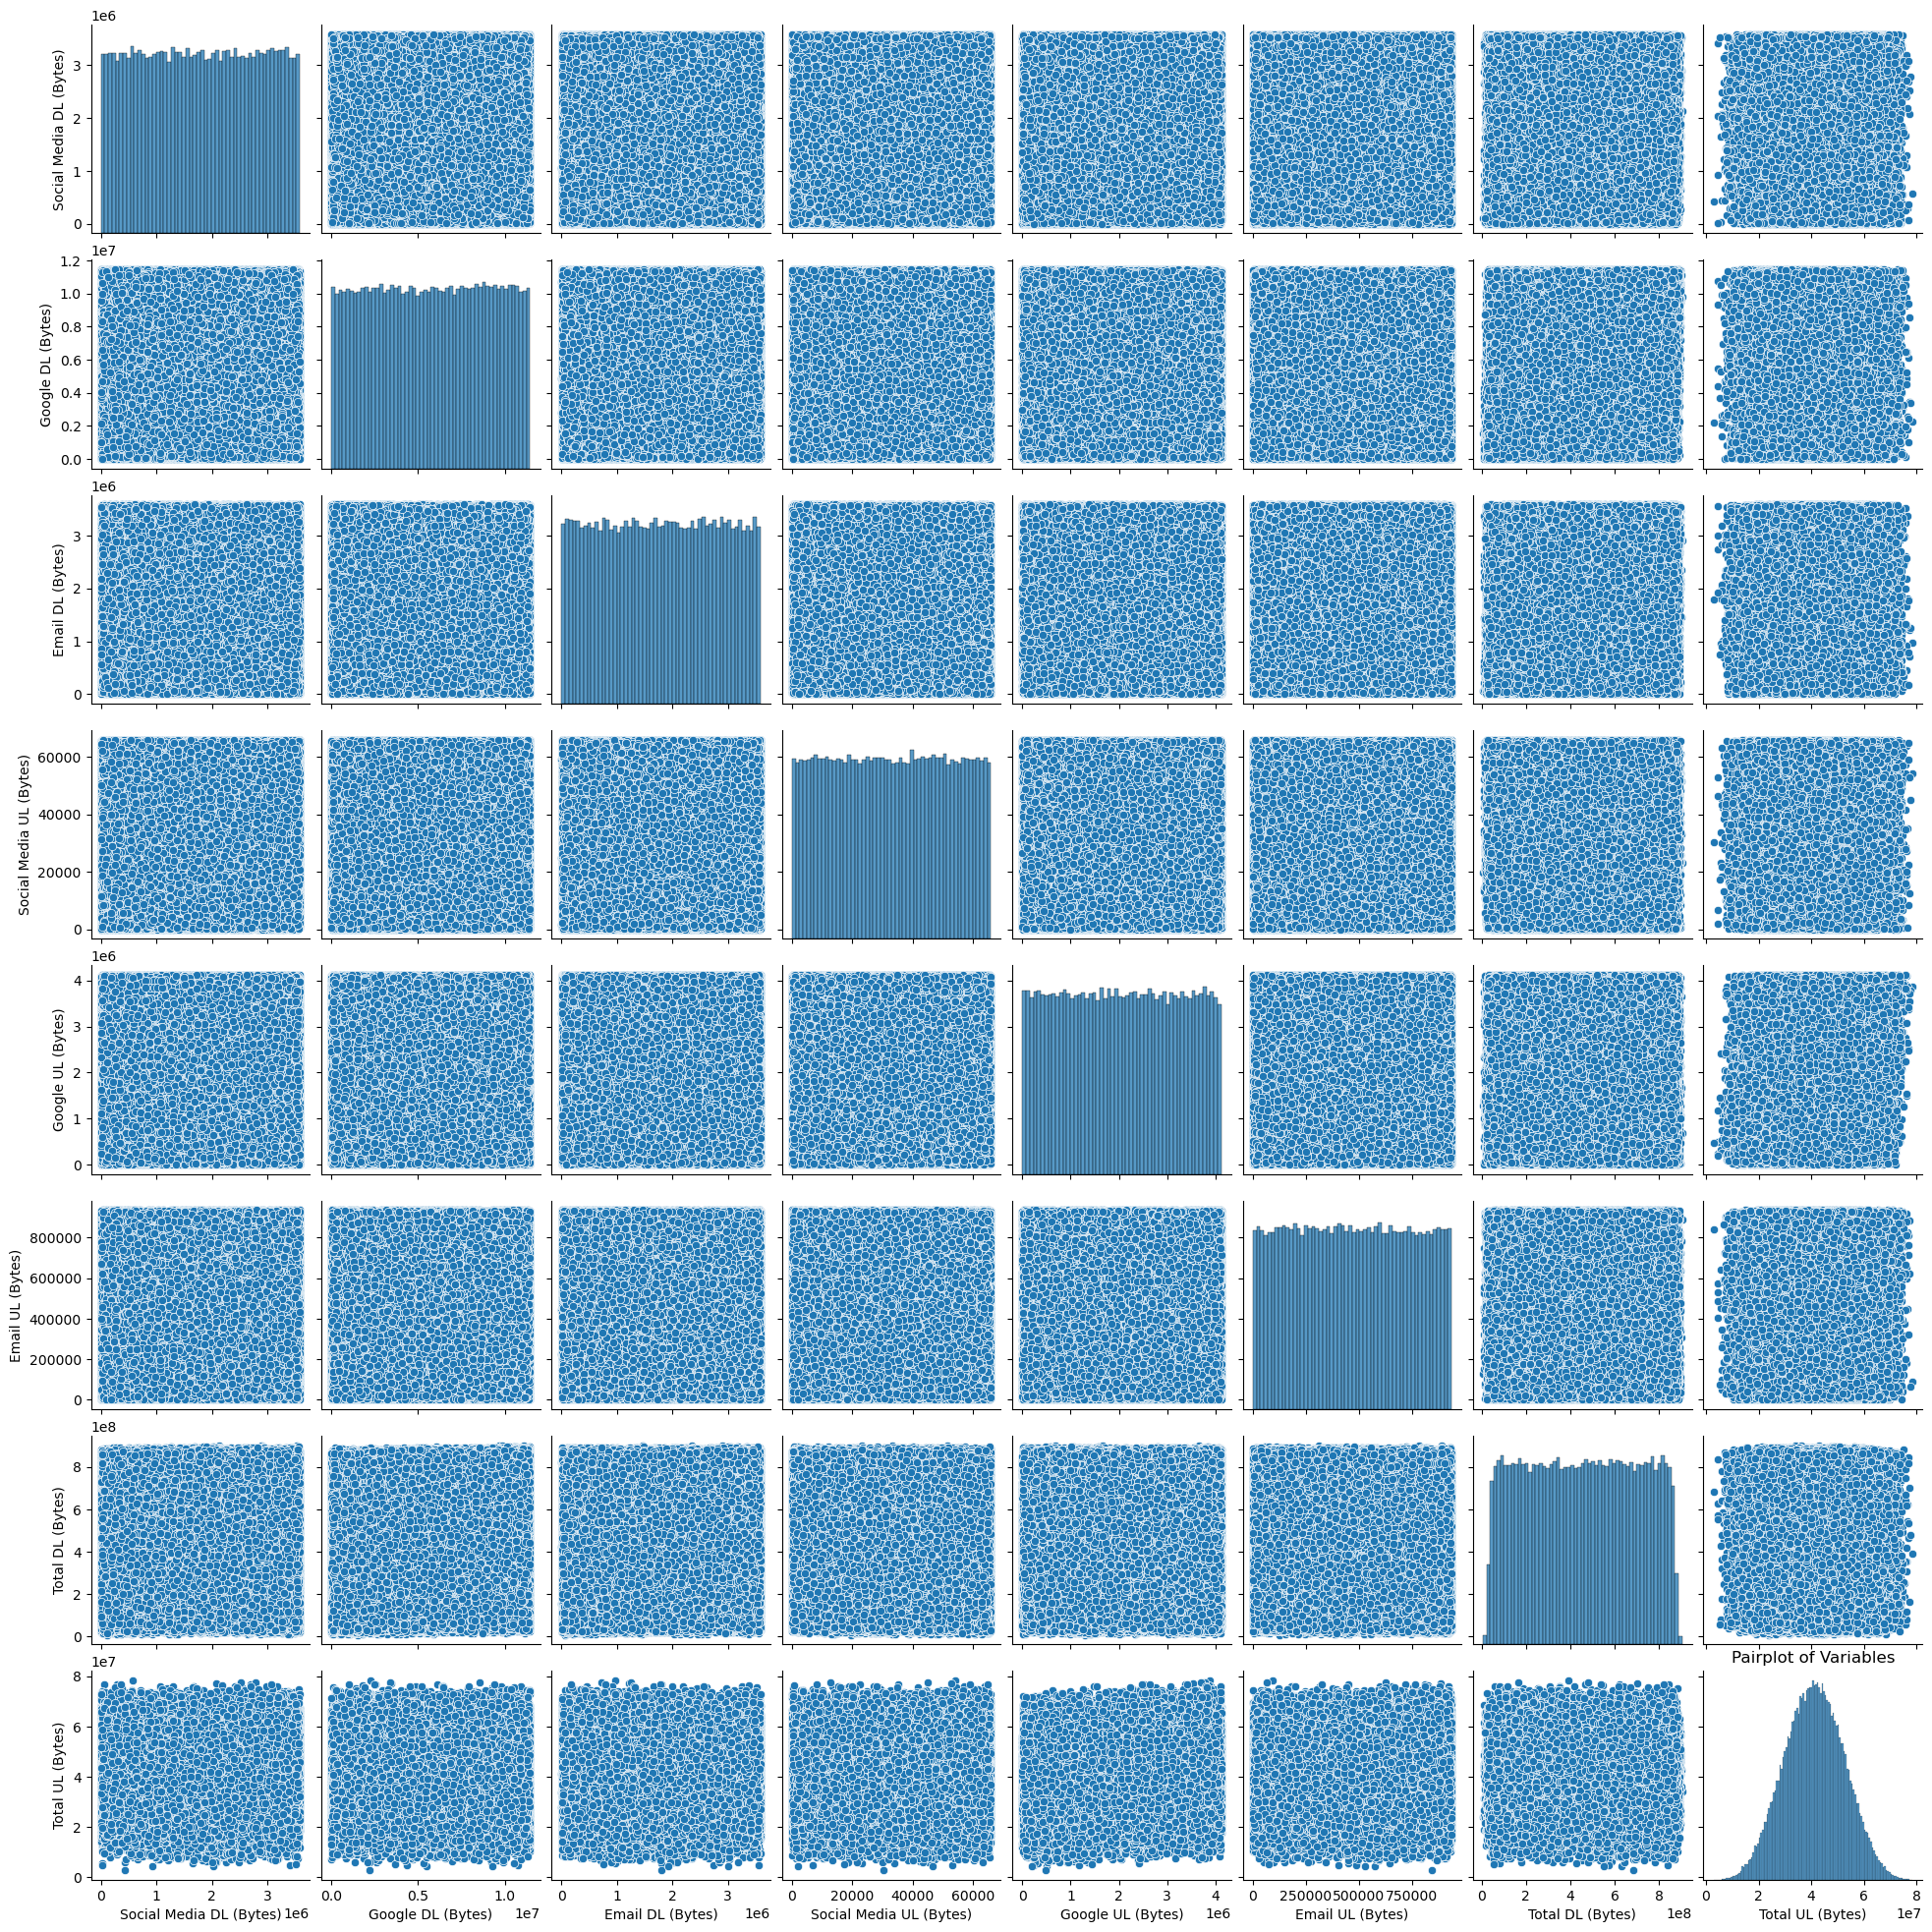

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# Bivariate Analysis
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)','Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)','Total DL (Bytes)', 'Total UL (Bytes)']])
plt.title("Pairplot of Variables")
plt.show()

In [34]:
# Variable Transformations
# We'll create a new column for total duration as an example
df['Total Duration'] = df['Dur. (ms)'] / 1000  # Assuming 'Dur. (ms)' represents duration in milliseconds, converting to seconds

# Then, we'll create deciles based on this new column
df['Total Duration Deciles'] = pd.qcut(df['Total Duration'], q=5, labels=False)

# Group by the decile classes and calculate the sum of 'Total DL (Bytes)' and 'Total UL (Bytes)' for each decile class
total_data_per_decile = df.groupby('Total Duration Deciles')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

print("Total Data (DL+UL) per Decile Class:")
print(total_data_per_decile)


Total Data (DL+UL) per Decile Class:
                        Total DL (Bytes)  Total UL (Bytes)
Total Duration Deciles                                    
0.0                         1.364932e+13      1.234248e+12
1.0                         2.165798e+13      1.962471e+12
2.0                         5.580722e+12      5.066822e+11
3.0                         1.362235e+13      1.232586e+12
4.0                         1.368615e+13      1.232194e+12


In [38]:
# Select the relevant columns for correlation analysis
selected_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
                    'Other DL (Bytes)']

# Compute the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
display (correlation_matrix)


Correlation Matrix:


Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000000   
Email DL (Bytes)                        0.004745          -0.000039   
Youtube DL (Bytes)                     -0.001389           0.001760   
Netflix DL (Bytes)                     -0.001817           0.000548   
Gaming DL (Bytes)                       0.001018          -0.001421   
Other DL (Bytes)                        0.006126          -0.002557   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.004745           -0.001389   
Google DL (Bytes)               -0.000039            0.001760   
Email DL (Bytes)                 1.000000            0.001679   
Youtube DL (Bytes)               0.001679            1.000000   
Netflix DL (Bytes)               0.001351            0.001202   
Gaming DL (Bytes)                0.000050           -0.001861   
Other DL (Bytes)                -0.000444            0.002042   

                         Netflix DL (Bytes)  Gaming DL (Bytes)  \
Social Media DL (Bytes)           -0.001817           0.001018   
Google DL (Bytes)                  0.000548          -0.001421   
Email DL (Bytes)                   0.001351           0.000050   
Youtube DL (Bytes)                 0.001202          -0.001861   
Netflix DL (Bytes)                 1.000000          -0.003201   
Gaming DL (Bytes)                 -0.003201           1.000000   
Other DL (Bytes)                  -0.006000          -0.002591   

                         Other DL (Bytes)  
Social Media DL (Bytes)          0.006126  
Google DL (Bytes)               -0.002557  
Email DL (Bytes)                -0.000444  
Youtube DL (Bytes)               0.002042  
Netflix DL (Bytes)              -0.006000  
Gaming DL (Bytes)               -0.002591  
Other DL (Bytes)                 1.000000

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame

# Drop non-numeric columns if necessary
numeric_df = df.select_dtypes(include=['float64'])

# Impute missing values if necessary
numeric_df.fillna(0, inplace=True)  # Replace missing values with zeros

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of components
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Concatenate the principal components DataFrame with the original DataFrame
result_df = pd.concat([df, principal_df], axis=1)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the transformed DataFrame with principal components
print("Transformed DataFrame with Principal Components:")
print(result_df[['PC1', 'PC2', 'PC3']])


MemoryError: Unable to allocate 13.7 MiB for an array with shape (150001, 12) and data type float64

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame

# Drop non-numeric columns if necessary
numeric_df = df.select_dtypes(include=['number'])

# Impute missing values if necessary
numeric_df.fillna(0, inplace=True)  # Replace missing values with zeros

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Perform PCA
pca = PCA(n_components=3)  # Specify the number of components
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Concatenate the principal components DataFrame with the original DataFrame
result_df = pd.concat([df, principal_df], axis=1)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the transformed DataFrame with principal components
print("Transformed DataFrame with Principal Components:")
print(result_df[['PC1', 'PC2', 'PC3']])


Explained Variance Ratio: [0.15052396 0.05900979 0.04921324]
Transformed DataFrame with Principal Components:
                 PC1           PC2           PC3
0      -3.592672e+00  3.984725e+00  1.904597e+01
1      -2.909314e+00  2.948023e+00  1.406415e+01
2      -2.924159e+00  2.989247e+00  1.404097e+01
3      -2.895561e+00  2.873883e+00  1.358814e+01
4      -2.550681e+00  2.379700e+00  1.108879e+01
...              ...           ...           ...
149996 -1.261646e+00  2.373502e-01  1.017925e-01
149997 -1.284191e+00  2.827890e-01  2.951842e-01
149998 -1.208248e+00  2.521277e-01  3.455581e-01
149999 -7.999125e-01  8.771193e-02  4.295000e-01
150000  1.773617e-16 -2.263774e-16 -2.059145e-15

[150001 rows x 3 columns]
